In [103]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy

import glob
from datetime import datetime
from collections import defaultdict

In [2]:
data_files = glob.glob("data/train/*")
text = []
for f in data_files:
    with open(f) as handle:
        text += handle.readlines()

In [3]:
def parse_line(line):
    t = line.split()
    flavor = t[1]
    y, m, d = t[2].split("-")
    y, m, d = int(y), int(m), int(d)
    h, mi, s = t[3].split(":")
    h, mi, s = int(h), int(mi), int(s)
    time = datetime(y, m, d, h, mi, s)
    return flavor, time

In [4]:
records = list(map(parse_line, text))
data = defaultdict(list)
_, start_time = records[0]
for flavor, time in records:
    data[flavor].append(time)

In [17]:
times = [d for _, dd in data.items() for d in dd]
flavors = [f for f, dd in data.items() for _ in dd]
df = pd.DataFrame({"times": times, "flavors": flavors}, columns = ['times', 'flavors'])
df['times'] = pd.to_datetime(df['times'])
df.index = df['times']

In [30]:
t = df["2015-2"][df["2015-2"].flavors == "flavor1"].count()

In [46]:
def get_flavor_monthly(flavor):
    l = []
    for m in range(1, 6):
        t = "2015-{}".format(m)
        v = df[t][df[t].flavors == flavor].count().flavors
        l.append(v)
    return l

In [61]:
def plot_by_month(flavor):
    l = get_flavor_monthly(flavor)
    sns.tsplot(data=l, time=range(1,6))

In [113]:
def get_flavor_weekly(flavor):
    t = df[df["flavors"] == flavor]
    return list(t.resample("w").count().flavors)

/usr/local/miniconda3/envs/huawei2018/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


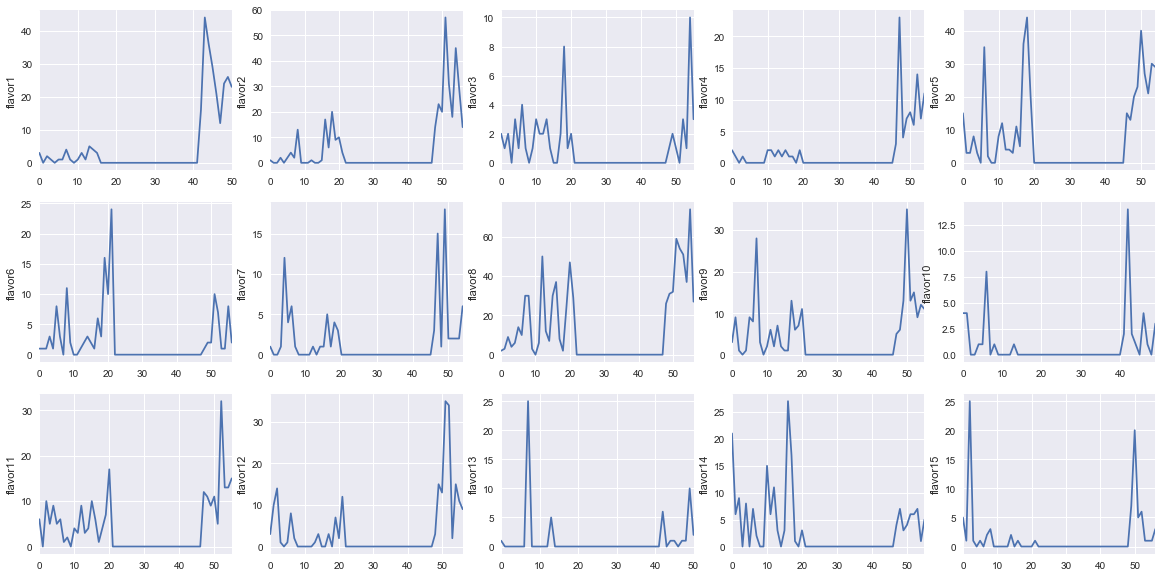

In [114]:
plt.figure(figsize=(20, 10))
for i in range(1, 16):
    plt.subplot(3, 5, i)
    sns.tsplot(data=get_flavor_weekly("flavor{}".format(i)), value="flavor{}".format(i))

/usr/local/miniconda3/envs/huawei2018/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


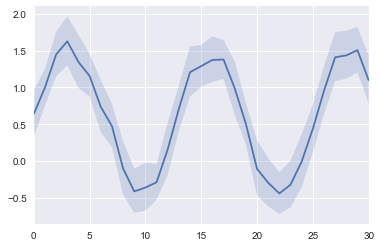